In [1]:
import torch
from pathlib import Path
import sys
import ocpmodels
import numpy as np

from ocpmodels.common.utils import (
    build_config,
    create_grid,
    save_experiment_log,
    setup_imports,
    setup_logging,
)
from ocpmodels.common.flags import flags
from ocpmodels.common.registry import registry

In [79]:
sys.argv.append("--mode=train")
sys.argv.append("--config=configs/is2re/10k/schnet/schnet.yml")
setup_logging()

In [80]:
parser = flags.get_parser()
args, override_args = parser.parse_known_args()
config = build_config(args, override_args)

In [81]:
config["dataset"]

[{'src': '/network/projects/_groups/ocp/oc20/is2re/10k/train/data.lmdb',
  'normalize_labels': True,
  'target_mean': -1.525913953781128,
  'target_std': 2.279365062713623},
 {'src': '/network/projects/_groups/ocp/oc20/is2re/all/val_id/data.lmdb'}]

In [82]:
config["optim"]["num_workers"] = 4
config["optim"]["batch_size"] = 10

In [83]:
config.get("trainer", "energy")

'energy'

In [84]:
setup_imports()
trainer = registry.get_trainer_class(config.get("trainer", "energy"))(
                task=config["task"],
                model=config["model"],
                dataset=config["dataset"],
                optimizer=config["optim"],
                identifier=config["identifier"],
                timestamp_id=config.get("timestamp_id", None),
                run_dir=config.get("run_dir", "./"),
                is_debug=True,
                print_every=config.get("print_every", 10),
                seed=config.get("seed", 0),
                logger=config.get("logger", "tensorboard"),
                local_rank=config["local_rank"],
                amp=config.get("amp", False),
                cpu=config.get("cpu", False),
                slurm=config.get("slurm", {}),
            )

amp: false
cmd:
  checkpoint_dir: /network/scratch/a/alexandre.duval/ocp/runs/1870990/checkpoints
  commit: 7ae0b32
  identifier: ''
  logs_dir: /network/scratch/a/alexandre.duval/ocp/runs/1870990/logs
  print_every: 1000
  results_dir: /network/scratch/a/alexandre.duval/ocp/runs/1870990/results
  seed: 0
  timestamp_id: 2022-05-30-17-43-28
data_split: null
dataset:
  normalize_labels: true
  src: /network/projects/_groups/ocp/oc20/is2re/10k/train/data.lmdb
  target_mean: -1.525913953781128
  target_std: 2.279365062713623
gpus: 1
logger: wandb
model: schnet
model_attributes:
  cutoff: 6.0
  hidden_channels: 256
  num_filters: 128
  num_gaussians: 100
  num_interactions: 3
  regress_forces: false
  use_pbc: true
note: ''
optim:
  batch_size: 10
  eval_batch_size: 64
  lr_gamma: 0.1
  lr_initial: 0.005
  lr_milestones:
  - 1562
  - 2343
  - 3125
  max_epochs: 20
  num_workers: 4
  warmup_factor: 0.2
  warmup_steps: 468
run_dir: !!python/object/apply:pathlib.PosixPath
- /
- network
- scra

/home/mila/a/alexandre.duval/.conda/envs/ocp/lib/python3.8/site-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [85]:
task = registry.get_task_class(config["mode"])(config)
task.setup(trainer)
for batch in trainer.train_loader:
    break
b = batch[0]

In [86]:
# Statistics on atoms seen in the dataset
from collections import Counter
from tqdm import tqdm
l = []
for batch in tqdm(trainer.train_loader): 
    l += batch[0].atomic_numbers.tolist()
dico = dict(Counter(l))
dico = sorted(dico.items(), key= lambda x: x[1], reverse=False)
print('set of atoms used: ', set(l))
print('number of atoms used:', len(set(l)))
print('frequencies:', dico)

# # Validation set
# l_bis = []
# for batch in tqdm(trainer.val_loader): 
#     l_bis += batch[0].atomic_numbers.unique().tolist()
# print('set of atoms used: ', set(l_bis))
# print(len(set(l_bis)))

 60%|██████    | 603/1000 [00:17<00:10, 38.04it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f14e7fd13a0>
Traceback (most recent call last):
  File "/home/mila/a/alexandre.duval/.conda/envs/ocp/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/home/mila/a/alexandre.duval/.conda/envs/ocp/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/home/mila/a/alexandre.duval/.conda/envs/ocp/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
 61%|██████    | 607/1000 [00:18<00:22, 17.14it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f14e7fd13a0>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f14e7fd13a0>Traceback (most recent c

set of atoms used:  {1.0, 5.0, 6.0, 7.0, 8.0, 11.0, 13.0, 14.0, 15.0, 16.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 55.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0}
number of atoms used: 56
frequencies: [(5.0, 672), (55.0, 2657), (37.0, 3817), (81.0, 4110), (80.0, 4246), (75.0, 4745), (48.0, 4827), (82.0, 5266), (83.0, 5668), (76.0, 5695), (19.0, 5996), (43.0, 6886), (17.0, 7958), (74.0, 8021), (38.0, 8627), (47.0, 8659), (8.0, 8821), (25.0, 8934), (11.0, 8945), (26.0, 9413), (79.0, 9493), (24.0, 9581), (51.0, 10475), (77.0, 10707), (50.0, 12207), (39.0, 12324), (42.0, 12460), (21.0, 12566), (27.0, 12656), (49.0, 12689), (29.0, 13369), (44.0, 13590), (41.0, 13828), (20.0, 15081), (30.0, 15240), (23.0, 15519), (32.0, 16003), (52.0, 16697), (6.0, 17186), (73.0, 17509), (33.0, 17618), (78.0, 18328), (45.0

# Continue comprehension of batch

In [29]:
print("Distances are equal to ||x_i-x_j||")
print(b.distances[0])
print( torch.norm(b.pos[b.edge_index[0,0]] - b.pos[b.edge_index[1,0]] ))

Distances are equal to ||x_i-x_j||
tensor(2.9223)
tensor(2.9223)


In [30]:
print("The proportion of fixed atoms is: ")
print((b.fixed==1).nonzero().shape[0] / b.atomic_numbers.shape[0])


The proportion of fixed atoms is: 
0.6363636363636364


In [31]:
b.ptr

tensor([  0,  40,  95, 138, 194, 272, 383, 453, 516, 583, 682])

In [32]:
print("we observe the atomic numbers & tags of the second graph of the batch:")
print(b.atomic_numbers[b.ptr[2]:b.ptr[3]])
print(b.tags[b.ptr[2]:b.ptr[3]])

we observe the atomic numbers & tags of the second graph of the batch:
tensor([39., 39., 39., 39., 39., 39., 39., 39., 14., 14., 14., 14., 14., 14.,
        14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 78., 78., 78., 78.,
        78., 78., 78., 78., 78., 78., 78., 78., 78., 78., 78., 78.,  6.,  6.,
         1.])
tensor([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2])


In [33]:
print("Is the edge_index matrix an ordered concatenation of individual graph edge_index matrix ? Meaning that we could take edge_index[b.natoms[0]:b.natoms[1]] and get exactly the second graph edges.")
print("Answer: YES")
for ind in range(b.sid.shape[0]): 
    node_indices = (b.batch==ind).nonzero().T[0]
    edges = b.edge_index[:,b.neighbors[:ind].sum():b.neighbors[:ind+1].sum()]
    node_list_from_edges = edges.reshape(1,-1).squeeze().tolist()
    if not set(node_list_from_edges).issubset(node_indices.tolist()): 
        print('Condition not satisfied')

Is the edge_index matrix an ordered concatenation of individual graph edge_index matrix ? Meaning that we could take edge_index[b.natoms[0]:b.natoms[1]] and get exactly the second graph edges.
Answer: YES


# Visualisation and explore cell offsets further

In [34]:
# Import libraries
from torch_geometric.utils.convert import to_networkx
import networkx as nx
import plotly.graph_objs as go

# Graph
graph_id = 0
g = b[graph_id]
G = to_networkx(g)


In [35]:
print('all nodes are/have offset neighbours')
prop_nonzero_cell_offsets = g.cell_offsets.nonzero().shape[0] / g.edge_index.shape[1]
edge_with_nonzero_cell_offsets = g.edge_index[:, g.cell_offsets.nonzero()[:,0]]
print(len(set(edge_with_nonzero_cell_offsets.reshape(-1).tolist()))) # all nodes have/are offset neighbours

all nodes are/have offset neighbours
40


In [36]:
print('Study offsets neighbours of node 0 in first graph of the batch')
offsets_neighbours_of_node0 = edge_with_nonzero_cell_offsets[:, :20][0,:].tolist()
set(offsets_neighbours_of_node0).issubset(list(G.neighbors(0)))
print('offset neighbours are a subset of its neighbors')

Study offsets neighbours of node 0 in first graph of the batch
offset neighbours are a subset of its neighbors


In [37]:
print(
    "Offset neighbours are always a subset of neighbours node, for the first graph of the batch"
)

edge_with_nonzero_cell_offsets = g.edge_index[:, g.cell_offsets.nonzero()[:, 0]]
for ind in range(b.natoms[0]):
    neighbours = (edge_with_nonzero_cell_offsets[1, :] == ind).nonzero().T[0].tolist()
    offset_neighbours = edge_with_nonzero_cell_offsets[:, neighbours][0, :].tolist()
    if not set(offset_neighbours).issubset(list(G.neighbors(ind))):
        print("Offset neighbours are not a subset of neighbours")


Offset neighbours are always a subset of neighbours node, for the first graph of the batch


Visualise the graph with networkx
But this graph does not take into consideration node positions


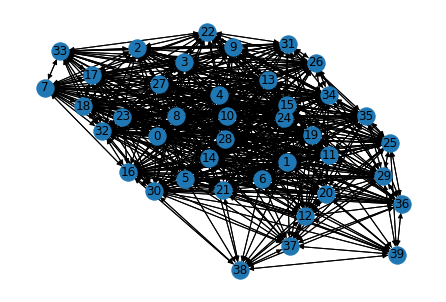

In [38]:
print('Visualise the graph with networkx')
nx.draw(G, with_labels = True)
print('But this graph does not take into consideration node positions')

In [39]:
print('Try 3D plots in networkx with atom positions')
# dico = {}
# for atom in atoms: 
#     dico[atom.item()] = b.pos[atom]
# pos = nx.spring_layout(G, dim=3)
# nx.draw(G, with_labels = True, pos=pos)
print('Networkx does not allow 3D positions')

# See ressource https://www.westgrid.ca/files/3Dgraphs-WestGridWebinar-May24.2016.pdf

Try 3D plots in networkx with atom positions
Networkx does not allow 3D positions


In [40]:
# 3D plots with plotly 
atoms = torch.argwhere(b.batch == graph_id).squeeze()

# Separate atom coordinates
x = [b.pos[atom][0].item() for atom in atoms] 
y = [b.pos[atom][1].item() for atom in atoms] 
z = [b.pos[atom][2].item() for atom in atoms] 

trace = go.Scatter3d(
   x = x, y = y, z = z,
   mode = 'markers+text', 
   text = atoms,
   textfont= dict(size=9),
   marker = dict(
      size = 12,
      color = b.tags[atoms], # set color to an array/list of desired values
      colorscale = 'Viridis'
      )
   )
layout = go.Layout(title = '3D plot of one adslab', width=900, height=700)
fig = go.Figure(data = [trace], layout = layout)
fig.show()


In [41]:
# There is not cell offsets in the z-axis 
torch.unique(torch.nonzero(b.cell_offsets)[:,1])

tensor([0, 1])

In [42]:
print('--- We analyse different types of neighbours ---')

# Fix again key params
graph_id = 0
g = b[graph_id]
G = to_networkx(g)
atom_idx = 18
atoms = torch.argwhere(b.batch == graph_id).squeeze()

# Compute neighbours
neighbours = list(G.neighbors(atom_idx))
edge_idx_with_nonzero_cell_offsets = g.edge_index[:, g.cell_offsets.nonzero()[:,0]]
offset_neighbours_idx = (edge_idx_with_nonzero_cell_offsets[1,:]==atom_idx).nonzero().T[0].tolist()
offset_neighbours = edge_idx_with_nonzero_cell_offsets[:, offset_neighbours_idx][0,:].tolist()
offset_neighbours = sorted(set(offset_neighbours))
non_offset_neighbours = g.edge_index[:,torch.where((g.cell_offsets==0).all(axis=1))[0]]
non_offset_neighbours = sorted(set(non_offset_neighbours[0,torch.where(non_offset_neighbours==atom_idx)[1]].tolist()))
non_offset_neighbours.remove(atom_idx)
duplicates = set(non_offset_neighbours)-(set(neighbours) - set(offset_neighbours))
not_neighbours = sorted( set(range(b.natoms[graph_id].item())) - set(neighbours+[atom_idx]) )

print('neighbours: ', neighbours)
print('offset neighbours: ', offset_neighbours)
print('non-offset neighbours: ', non_offset_neighbours)
print('not neighbours: ', not_neighbours)
print('double neighbourhood status:', duplicates)

--- We analyse different types of neighbours ---
neighbours:  [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 17, 19, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34]
offset neighbours:  [6, 7, 10, 15, 17, 21, 22, 27, 28, 34]
non-offset neighbours:  [0, 2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 17, 19, 23, 24, 26, 28, 29, 30, 31, 32, 33, 34]
not neighbours:  [1, 12, 16, 20, 25, 35, 36, 37, 38, 39]
double neighbourhood status: {17, 34, 28, 7}


In [43]:
# non_offset_neighbours = g.edge_index[:,torch.where((g.cell_offsets==0).all(axis=1))[0]]
#non_offset_neighbours = sorted(set(non_offset_neighbours[0,torch.where(non_offset_neighbours==atom_idx)[1]].tolist()))
#non_offset_neighbours.remove(atom_idx)
print(set(neighbours))
print(set(non_offset_neighbours))
print(non_offset_neighbours)

{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 17, 19, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34}
{0, 2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 17, 19, 23, 24, 26, 28, 29, 30, 31, 32, 33, 34}
[0, 2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 17, 19, 23, 24, 26, 28, 29, 30, 31, 32, 33, 34]


In [44]:
g.edge_index[:,torch.argwhere( (g.edge_index == torch.tensor([27,18]).unsqueeze(dim=1)).all(dim=0) ).squeeze().tolist()]

tensor([[27, 27],
        [18, 18]])

In [45]:
# Check that 27 is twice an offset neighbour for node 18
print(g.cell_offsets[torch.argwhere( (g.edge_index == torch.tensor([27,18]).unsqueeze(dim=1)).all(dim=0) ).squeeze().tolist()])
print(g.distances[torch.argwhere( (g.edge_index == torch.tensor([27,18]).unsqueeze(dim=1)).all(dim=0) ).squeeze().tolist()])
print(torch.norm(g.pos[18]-g.pos[27]))

indices = torch.argwhere( (g.edge_index == torch.tensor([27,atom_idx]).unsqueeze(dim=1)).all(dim=0) ).squeeze()
new_node_pos = g.pos[27] + torch.norm(g.cell[graph_id], dim=1) * g.cell_offsets[indices] 
print(new_node_pos)
print(b.pos[atom_idx])
print('new dist: ', torch.norm(new_node_pos[0] - b.pos[atom_idx]).item())
print('new dist: ', torch.norm(new_node_pos[1] - b.pos[atom_idx]).item())


tensor([[ 0, -1,  0],
        [ 1,  0,  0]])
tensor([5.4535, 5.5394])
tensor(7.8788)
tensor([[-1.9856, -1.8837, 13.9365],
        [ 8.9901,  6.5916, 13.9365]])
tensor([ 5.0868,  3.1800, 14.5819])
new dist:  8.72223949432373
new dist:  5.224082946777344


In [46]:
print(g.cell_offsets[torch.argwhere( (g.edge_index == torch.tensor([34,atom_idx]).unsqueeze(dim=1)).all(dim=0) ).squeeze().tolist()])
print(g.distances[torch.argwhere( (g.edge_index == torch.tensor([34,atom_idx]).unsqueeze(dim=1)).all(dim=0) ).squeeze().tolist()])
print(torch.norm(g.pos[atom_idx]-g.pos[34]))

indices = torch.argwhere( (g.edge_index == torch.tensor([34,atom_idx]).unsqueeze(dim=1)).all(dim=0) ).squeeze()
new_node_pos = g.pos[34] + torch.norm(g.cell[graph_id], dim=1) * g.cell_offsets[indices] 
print(new_node_pos)
print(b.pos[atom_idx])
print('new dist: ', torch.norm(new_node_pos[0] - b.pos[atom_idx]).item())
print('new dist: ', torch.norm(new_node_pos[1] - b.pos[atom_idx]).item())

print('We have not found proper offset distance while we find correct cell distance')


tensor([[0, 1, 0],
        [0, 0, 0]])
tensor([4.9985, 4.9988])
tensor(4.9988)
tensor([[ 9.2341,  9.2179, 15.9410],
        [ 9.2341,  0.7426, 15.9410]])
tensor([ 5.0868,  3.1800, 14.5819])
new dist:  7.450113773345947
new dist:  4.99879264831543
We have not found proper offset distance while we find correct cell distance


In [47]:
# Check for edges with multiplicity > 1 (called "duplicates")
# Careful: this method also counts as duplicates nodes who are twice offset-neighbors, and which may not be direct neighbor. 
atom_idx = 18

indices = []
for edge in g.edge_index.T: 
    indices.append(torch.argwhere( (g.edge_index == edge.unsqueeze(dim=1)).all(dim=0) ).squeeze().tolist())
all_double_edges_indices = [index for index in indices if isinstance(index, list)]
flat_list = [item for sublist in all_double_edges_indices for item in sublist]
all_double_edges = g.edge_index[:,flat_list]
print('duplicate neighbours:', set(all_double_edges[:,torch.nonzero(all_double_edges==atom_idx, as_tuple=True)[1]][0].tolist())-{atom_idx})

duplicate neighbours: {34, 7, 17, 27, 28}


In [48]:
# Look for duplicate edges - brute force 
# Careful: this method also counts as duplicates nodes who are twice offset-neighbors, and which may not be direct neighbor. 
atom_idx = 18
memory=[]
duplicates=[]
for edge in g.edge_index.T: 
    edge=edge.tolist()
    if edge in memory: 
        duplicates.append(edge)
    else: 
        memory.append(edge)

l=[subit for item in duplicates for subit in item if atom_idx in item]
print(set(l)-{atom_idx})


{34, 7, 17, 27, 28}


In [49]:
# 3D plots with plotly - run after above cell

# Separate atom coordinates
x = [b.pos[atom][0].item() for atom in atoms] 
y = [b.pos[atom][1].item() for atom in atoms] 
z = [b.pos[atom][2].item() for atom in atoms] 

# Define new colour scheme based on neighbourhood to see offset clearer
colour_list = []
for atom in atoms: 
    if atom.item() in offset_neighbours: 
        colour_list.append("orange")
    elif atom.item() in non_offset_neighbours: 
        colour_list.append("blue")
    elif atom.item() in not_neighbours:
        colour_list.append("black")
    elif atom.item() == atom_idx:
        colour_list.append("red")

trace = go.Scatter3d(
   x = x, y = y, z = z,
   mode = 'markers+text', 
   text = atoms,
   textfont= dict(size=9),
   marker = dict(
      size = 12,
      color = colour_list, # set color to an array/list of desired values
      colorscale = 'rainbow'
      )
   )
layout = go.Layout(title = '3D plot of one adslab', width=900, height=700)
fig = go.Figure(data = [trace], layout = layout)
fig.show()

In [50]:
# Check distances between different neighbours types
non_offset_nei_distances = []
target_atom = b.pos[atom_idx]
for node in non_offset_neighbours: 
    non_offset_nei_distances.append(torch.norm(b.pos[node] - target_atom).item())

offset_nei_distances = []
for node in offset_neighbours: 
    offset_nei_distances.append(torch.norm(b.pos[node] - target_atom).item())

non_neighbours_distances = []
for node in not_neighbours: 
    non_neighbours_distances.append(torch.norm(b.pos[node] - target_atom).item())

# Print max and min distances of those categories
print(min(non_offset_nei_distances), max(non_offset_nei_distances))
print(min(offset_nei_distances), max(offset_nei_distances))
print(min(non_neighbours_distances), max(non_neighbours_distances))

# Inconsistency ? When node 14 is not a direct neighbour while it is closer than node 34 from target node (36)
# Otherwise, different categories are consistent wrt distances to target node. 

2.477170467376709 5.161107540130615
4.444634914398193 9.515790939331055
6.427070617675781 9.380122184753418


In [51]:
# Find closest non-offset-neigbour
node = offset_neighbours[np.argmin(offset_nei_distances)]
print(node)
print(b.pos[node])
print(target_atom)
print(torch.norm(b.pos[node] - target_atom).item())

17
tensor([ 3.9737,  6.8471, 12.3306])
tensor([ 5.0868,  3.1800, 14.5819])
4.444634914398193


[6, 7, 10, 15, 17, 21, 22, 27, 28, 34]

In [63]:
# Get index in edge_index of a target edge (offset neighbour especially)
for n in offset_neighbours:
#n=10

    indices = torch.argwhere( (g.edge_index == torch.tensor([n,atom_idx]).unsqueeze(dim=1)).all(dim=0) ).squeeze()

    # To speed up, restrict edge_index to graph_id indices.
    # b.edge_index[sum(b.neighbors[:graph_id]):sum(b.neighbors[:graph_id+1])] instead of b.edge_index

    new_node_pos = g.pos[n] + g.cell[graph_id] * g.cell_offsets[indices] # not matrix multiplication 

    print('new dist: ', torch.norm(new_node_pos - target_atom).item())
    #print('old dist: ', torch.norm(b.pos[n] - target_atom).item()) 

new dist:  17.012649536132812


RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 0

In [157]:
# Get index in edge_index of a target edge (offset neighbour especially)
for n in offset_neighbours:

    indices = torch.argwhere( (g.edge_index == torch.tensor([n,atom_idx]).unsqueeze(dim=1)).all(dim=0) ).squeeze()

    # To speed up, restrict edge_index to graph_id indices.
    # b.edge_index[sum(b.neighbors[:graph_id]):sum(b.neighbors[:graph_id+1])] instead of b.edge_index

    new_node_pos = g.pos[n] + torch.norm(g.cell[graph_id], dim=1) * g.cell_offsets[indices] 

    print('new dist: ', torch.norm(new_node_pos - target_atom).item())
    #print('old dist: ', torch.norm(b.pos[n] - target_atom).item()) 

new dist:  9.611332893371582
new dist:  4.5916900634765625
new dist:  11.308942794799805
new dist:  10.9431791305542
new dist:  13.396843910217285
new dist:  12.865463256835938
new dist:  10.496005058288574
new dist:  2.8995559215545654
new dist:  13.298970222473145
new dist:  9.149995803833008
new dist:  8.928074836730957
new dist:  10.01535415649414
new dist:  4.143951892852783
new dist:  14.219304084777832
new dist:  12.825587272644043
new dist:  8.812522888183594
new dist:  8.20339298248291


In [58]:
# There are dupplicates in edge_index
b.edge_index[:,1315:1320]

# Prove data has duplicates 
import torch_geometric
A = torch_geometric.utils.coalesce(b.edge_index)
print('Edge matrix has duplicates ?', A.shape[1] < b.edge_index.shape[1])

# Edge duplicates show that a node is in the true neighbourhood and in the cut-off ! 

## For any graph

In [37]:
# Graph
graph_id = 4
g = b[graph_id]
G = to_networkx(g)
atoms = torch.argwhere(b.batch == graph_id).squeeze()

# 3D plots with plotly 

# Separate atom coordinates
x = [b.pos[atom][0].item() for atom in atoms] 
y = [b.pos[atom][1].item() for atom in atoms] 
z = [b.pos[atom][2].item() for atom in atoms] 

trace = go.Scatter3d(
   x = x, y = y, z = z,
   mode = 'markers+text', 
   text = list(range(atoms.shape[0])),
   textfont= dict(size=9),
   marker = dict(
      size = 12,
      color = b.tags[atoms], # set color to an array/list of desired values
      colorscale = 'Viridis'
      )
   )
layout = go.Layout(title = '3D plot of one adslab - new graph', width=900, height=700)
fig = go.Figure(data = [trace], layout = layout)
fig.show()

In [133]:
atoms = torch.argwhere(b.batch == graph_id).squeeze()
atom_idx = 0

edge_idx_with_nonzero_cell_offsets = g.edge_index[:, g.cell_offsets.nonzero()[:, 0]]
offset_neighbours_idx = (
    (edge_idx_with_nonzero_cell_offsets[1, :] == atom_idx).nonzero().T[0].tolist()
)
offset_neighbours = edge_idx_with_nonzero_cell_offsets[:, offset_neighbours_idx][
    0, :
].tolist()
neighbours = list(G.neighbors(atom_idx))
non_offset_neighbours = sorted(list(set(neighbours) - set(offset_neighbours)))
not_neighbours = sorted(list(set(range(b.natoms[graph_id].item())) - set(neighbours)))
offset_neighbours = sorted(list(set(offset_neighbours)))


# 3D plots with plotly

# Define new colour scheme based on neighbourhood to see offset clearer
colour_list = []
for i, atom in enumerate(atoms):
    if i in offset_neighbours:
        colour_list.append("orange")
    elif i in non_offset_neighbours:
        colour_list.append("blue")
    elif i in not_neighbours:
        colour_list.append("black")
colour_list[atom_idx] = "red"

offset_atoms = set(
    a
    for a in g.cell_offsets.nonzero()[:, 0].numpy()
    if (a in set(atoms.numpy())) and (a != int(atoms[atom_idx]))
)


for n in atoms:
    if n in offset_neighbours:
        indices = torch.argwhere( (b.edge_index == torch.tensor([n,atom_idx]).unsqueeze(dim=1)).all(dim=0) ).squeeze()
        new_node_pos= b.pos[n] + torch.norm(b.cell[graph_id], dim=1) * b.cell_offsets[indices] 
        x.append(new_node_pos[0].item())
        y.append(new_node_pos[1].item())
        z.append(new_node_pos[2].item())
    else: 
        x.append(b.pos[n][0].item())
        y.append(b.pos[n][1].item())
        z.append(b.pos[n][2].item())

    # To speed up, restrict edge_index to graph_id indices.
    # b.edge_index[sum(b.neighbors[:graph_id]):sum(b.neighbors[:graph_id+1])] instead of b.edge_index

# x = [
#     b.pos[atom] + torch.norm(b.cell[graph_id], dim=1) * b.cell_offsets[torch.argwhere( 
#         (b.edge_index == torch.tensor([n,atom_idx]).unsqueeze(dim=1)).all(dim=0) ).squeeze()] 
#     for atom in atoms
# ]
# y = [
#     b.pos[atom][1].item() + g.cell_offsets[atom][1] * torch.norm(g.cell[0][1])
#     for atom in atoms
# ]
# z = [
#     b.pos[atom][2].item() + g.cell_offsets[atom][2] * torch.norm(g.cell[0][2])
#     for atom in atoms
# ]

trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode="markers+text",
    text=atoms,
    textfont=dict(size=9),
    marker=dict(
        size=12,
        color=colour_list,  # set color to an array/list of desired values
        colorscale="rainbow",
    ),
)
layout = go.Layout(title="3D plot of one adslab", width=900, height=700)
fig = go.Figure(data=[trace], layout=layout)
fig.show()


ValueError: only one element tensors can be converted to Python scalars

True

In [73]:
offset_atoms

{194, 254, 256, 259, 263, 266, 268, 270, 271}

In [69]:
g.cell.shape

torch.Size([1, 3, 3])

In [29]:
offset_atoms

{10, 19, 29, 38, 50, 51, 58, 63, 67, 71}

In [37]:
atoms

tensor([194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
        208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
        222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
        236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249,
        250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263,
        264, 265, 266, 267, 268, 269, 270, 271])